#pre-modeling


## setup

In [5574]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5575]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [5576]:
import pandas as pd

In [5577]:
Combo=pd.read_csv("data.csv")

In [5578]:
display(Combo)

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMNP,URDMNPLC,URXMOH,URDMOHLC,URXMZP,URDMZPLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC
0,0.0,0.20,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,0.8,0.0,0.6,0.0,0.14,1.0,0.07,1.0
1,0.0,0.30,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,7.7,0.0,4.1,0.0,0.60,0.0,0.20,0.0
2,0.0,0.10,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,138.70,0.0,21.9,0.0,6.5,0.0,1.60,0.0,0.50,0.0
3,0.0,0.20,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,...,3.50,0.0,26.4,0.0,14.7,0.0,0.14,1.0,0.40,0.0
4,0.0,0.10,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,6.8,0.0,2.7,0.0,0.40,0.0,0.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,0.07,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,1.5,0.0,4.4,0.0,0.50,0.0,0.60,0.0
2120,0.0,0.20,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,1.9,0.0,3.4,0.0,0.30,0.0,0.40,0.0
2121,0.0,0.90,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,2.0,0.0,1.8,0.0,0.14,1.0,0.30,0.0
2122,0.0,0.20,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,3.20,0.0,11.7,0.0,6.9,0.0,0.14,1.0,0.07,1.0


In [5579]:
Combo.isna().sum().sum()

0

##PFAS dataframe

In [5580]:
!pip install xport

In [5581]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


In [5582]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS=df_PFAS.drop(columns = 'WTSB2YR') #drop weight
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [5583]:
display(df_PFAS)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.5,0.0,0.10,0.0,0.07,1.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.3,0.0,0.07,1.0,0.07,1.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.07,1.0,0.07,1.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,0.6,0.0,0.07,1.0,0.10,0.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.3,0.0,0.07,1.0,0.07,1.0
2334,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0
2335,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.5,0.0,0.50,0.0,0.30,0.0
2336,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0


##making the ouside DF


In [5584]:
DF=Combo.copy()
for col in DF.columns:
  if (col != 'SEQN') and (col != 'LBDMPAHL') and (col != 'LBXMPAH') and (col in df_PFAS):
    DF=DF.drop(columns=col)
DF



,LBXMPAH,LBDMPAHL,URXBP3,URDBP3LC,URXBPH,URDBPHLC,URXTLC,URDTLCLC,URXTRS,URDTRSLC,...,URXMNP,URDMNPLC,URXMOH,URDMOHLC,URXMZP,URDMZPLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC
0,0.20,0.0,29.1,0.0,0.20,0.0,0.20,0.0,63.5,0.0,...,0.64,1.0,0.8,0.0,0.6,0.0,0.14,1.0,0.07,1.0
1,0.20,0.0,6.0,0.0,1.70,0.0,0.20,0.0,23.5,0.0,...,0.64,1.0,7.7,0.0,4.1,0.0,0.60,0.0,0.20,0.0
2,0.07,1.0,13.4,0.0,1.20,0.0,0.07,1.0,6.5,0.0,...,138.70,0.0,21.9,0.0,6.5,0.0,1.60,0.0,0.50,0.0
3,0.07,1.0,24.6,0.0,1.50,0.0,0.10,0.0,77.9,0.0,...,3.50,0.0,26.4,0.0,14.7,0.0,0.14,1.0,0.40,0.0
4,0.07,1.0,11.6,0.0,2.70,0.0,0.07,1.0,9.5,0.0,...,0.64,1.0,6.8,0.0,2.7,0.0,0.40,0.0,0.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,0.20,0.0,3.6,0.0,2.60,0.0,0.07,1.0,1.7,0.0,...,0.64,1.0,1.5,0.0,4.4,0.0,0.50,0.0,0.60,0.0
2120,0.07,1.0,11.0,0.0,0.50,0.0,0.07,1.0,1.2,1.0,...,0.64,1.0,1.9,0.0,3.4,0.0,0.30,0.0,0.40,0.0
2121,0.07,1.0,1.4,0.0,0.14,1.0,0.07,1.0,1.2,1.0,...,0.64,1.0,2.0,0.0,1.8,0.0,0.14,1.0,0.30,0.0
2122,0.07,1.0,9.1,0.0,2.00,0.0,0.20,0.0,1.2,1.0,...,3.20,0.0,11.7,0.0,6.9,0.0,0.14,1.0,0.07,1.0


##making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

In [5585]:
d_p = {}
for col in DF.columns:
  if col.endswith('LC'):
    p = round(((DF[col][DF[col]==0].count())/len(DF))*100,2)
    d_p[col] = p


In [5586]:
d_p

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPFLC': 65.16,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDBUPLC': 32.2,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDEPBLC': 49.39,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMHPLC': 61.25,
 'URDMIBLC': 97.18,
 'URDMNPLC': 39.36,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTLCLC': 41.05,
 'URDTRSLC': 76.22,
 'URXTLC': 0.0}

In [5587]:
d_p.pop("URXTLC")

0.0

In [5588]:
d_p

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPFLC': 65.16,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDBUPLC': 32.2,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDEPBLC': 49.39,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMHPLC': 61.25,
 'URDMIBLC': 97.18,
 'URDMNPLC': 39.36,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTLCLC': 41.05,
 'URDTRSLC': 76.22}

In [5589]:
len(d_p)

25

In [5590]:
type(d_p)
import numpy as np
L2=np.array(list(d_p.items()))

##Decide which we can treat as binary


In [5591]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p.items() if (val <= 30 or val >= 70)}

In [5592]:
binary_variables

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMIBLC': 97.18,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTRSLC': 76.22}

In [5593]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
bin = list(binary_variables.keys())
print(bin)
for i in bin:
    binary_cols = DF[i]
    binary_dataset[i] = binary_cols
print(binary_dataset)


['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC', 'URDBPSLC']
{'URDBP3LC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    0.0
2122    0.0
2123    0.0
Name: URDBP3LC, Length: 2124, dtype: float64, 'URDBPHLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    1.0
2122    0.0
2123    0.0
Name: URDBPHLC, Length: 2124, dtype: float64, 'URDTRSLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    1.0
2121    1.0
2122    1.0
2123    0.0
Name: URDTRSLC, Length: 2124, dtype: float64, 'URDMPBLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    0.0
2122    0.0
2123    0.0
Name: URDMPBLC, Length: 2124, dtype: float64, 'URDPPBLC'

In [5594]:
binary_list = []
for key in binary_dataset:
  binary_list.append(key)


In [5595]:
len(binary_list)

19

In [5596]:
print(binary_list)

['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC', 'URDBPSLC']


In [5597]:
binary_df = DF.copy()
for i in binary_df.columns:
  if i not in binary_list:
    binary_df = binary_df.drop(columns=i)
binary_df.head()

,URDBP3LC,URDBPHLC,URDTRSLC,URDMPBLC,URDPPBLC,URD14DLC,URDDCBLC,URDCNPLC,URDCOPLC,URDECPLC,URDMBPLC,URDMC1LC,URDMEPLC,URDMHHLC,URDMCHLC,URDMIBLC,URDMOHLC,URDMZPLC,URDBPSLC
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5598]:
binary_df.columns

Index(['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC',
       'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC',
       'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC',
       'URDBPSLC'],
      dtype='object')

In [5599]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

In [5600]:
binary_df.columns

Index(['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC',
       'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC',
       'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC',
       'URDBPSLC'],
      dtype='object')

##which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [5601]:
intersection_set = set.intersection(set(DF.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [5602]:
print(len(intersection_list))

19


In [5603]:
intersection_list

['URD14DLC',
 'URDTRSLC',
 'URDMPBLC',
 'URDCOPLC',
 'URDBPHLC',
 'URDMEPLC',
 'URDMBPLC',
 'URDMHHLC',
 'URDMOHLC',
 'URDCNPLC',
 'URDPPBLC',
 'URDECPLC',
 'URDDCBLC',
 'URDMZPLC',
 'URDBPSLC',
 'URDMCHLC',
 'URDMC1LC',
 'URDMIBLC',
 'URDBP3LC']

In [5604]:
#percentage of what is binary in df
len(intersection_list)/len(DF)*100

0.8945386064030132

In [5605]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop=[]
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [5606]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

19

In [5607]:
print(cols_to_drop)

['URX14D', 'URXTRS', 'URXMPB', 'URXCOP', 'URXBPH', 'URXMEP', 'URXMBP', 'URXMHH', 'URXMOH', 'URXCNP', 'URXPPB', 'URXECP', 'URXDCB', 'URXMZP', 'URXBPS', 'URXMCH', 'URXMC1', 'URXMIB', 'URXBP3']


In [5608]:
type(cols_to_drop)

list

In [5609]:
#particular naming convention
cols_to_drop = ['URXMHNC' if item == 'URXMCH' else item for item in cols_to_drop]

In [5610]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
DF=DF.drop(columns=cols_to_drop)

In [5611]:
display(DF)

,LBXMPAH,LBDMPAHL,URDBP3LC,URDBPHLC,URXTLC,URDTLCLC,URDTRSLC,URXBUP,URDBUPLC,URXEPB,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,0.20,0.0,0.0,0.0,0.20,0.0,0.0,0.07,1.0,2.20,...,0.57,1.0,1.0,0.64,1.0,0.0,0.0,0.14,1.0,1.0
1,0.20,0.0,0.0,0.0,0.20,0.0,0.0,0.07,1.0,0.71,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.60,0.0,0.0
2,0.07,1.0,0.0,0.0,0.07,1.0,0.0,0.07,1.0,1.10,...,7.50,0.0,0.0,138.70,0.0,0.0,0.0,1.60,0.0,0.0
3,0.07,1.0,0.0,0.0,0.10,0.0,0.0,0.07,1.0,36.40,...,5.70,0.0,0.0,3.50,0.0,0.0,0.0,0.14,1.0,0.0
4,0.07,1.0,0.0,0.0,0.07,1.0,0.0,83.10,0.0,107.10,...,2.30,0.0,0.0,0.64,1.0,0.0,0.0,0.40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,0.20,0.0,0.0,0.0,0.07,1.0,0.0,0.07,1.0,0.71,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.50,0.0,0.0
2120,0.07,1.0,0.0,0.0,0.07,1.0,1.0,0.07,1.0,0.71,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.30,0.0,0.0
2121,0.07,1.0,0.0,1.0,0.07,1.0,1.0,0.07,1.0,0.71,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.14,1.0,0.0
2122,0.07,1.0,0.0,0.0,0.20,0.0,1.0,0.07,1.0,0.71,...,4.80,0.0,0.0,3.20,0.0,0.0,0.0,0.14,1.0,1.0


##taking log of continuous values

In [5612]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = DF.columns[DF.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in DF.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    DF[col] = np.log(DF[col])

In [5613]:
display(DF)

,LBXMPAH,LBDMPAHL,URDBP3LC,URDBPHLC,URXTLC,URDTLCLC,URDTRSLC,URXBUP,URDBUPLC,URXEPB,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,-1.609438,0.0,0.0,0.0,-1.609438,0.0,0.0,-2.659260,1.0,0.788457,...,-0.562119,1.0,1.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,1.0
1,-1.609438,0.0,0.0,0.0,-1.609438,0.0,0.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.510826,0.0,0.0
2,-2.659260,1.0,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,0.095310,...,2.014903,0.0,0.0,4.932313,0.0,0.0,0.0,0.470004,0.0,0.0
3,-2.659260,1.0,0.0,0.0,-2.302585,0.0,0.0,-2.659260,1.0,3.594569,...,1.740466,0.0,0.0,1.252763,0.0,0.0,0.0,-1.966113,1.0,0.0
4,-2.659260,1.0,0.0,0.0,-2.659260,1.0,0.0,4.420045,0.0,4.673763,...,0.832909,0.0,0.0,-0.446287,1.0,0.0,0.0,-0.916291,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,-1.609438,0.0,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.693147,0.0,0.0
2120,-2.659260,1.0,0.0,0.0,-2.659260,1.0,1.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.203973,0.0,0.0
2121,-2.659260,1.0,0.0,1.0,-2.659260,1.0,1.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
2122,-2.659260,1.0,0.0,0.0,-1.609438,0.0,1.0,-2.659260,1.0,-0.342490,...,1.568616,0.0,0.0,1.163151,0.0,0.0,0.0,-1.966113,1.0,1.0


##Splitting the data
We are trying to predict detect or not of Perfluorodecanoic acid (ug/L)

In [5614]:
DF.columns

Index(['LBXMPAH', 'LBDMPAHL', 'URDBP3LC', 'URDBPHLC', 'URXTLC', 'URDTLCLC',
       'URDTRSLC', 'URXBUP', 'URDBUPLC', 'URXEPB', 'URDEPBLC', 'URDMPBLC',
       'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC',
       'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URXMHP',
       'URDMHPLC', 'URDMIBLC', 'URXMNP', 'URDMNPLC', 'URDMOHLC', 'URDMZPLC',
       'URXBPF', 'URDBPFLC', 'URDBPSLC'],
      dtype='object')

In [5615]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(DF, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBXMPAH', 'LBDMPAHL'])
X_test=test.drop(columns=['LBXMPAH', 'LBDMPAHL'])
Y_train=train['LBDMPAHL']
Y_test=test['LBDMPAHL']

In [5616]:
include=list(X_train.columns)

## Scaled train and test

In [5617]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#logistic regression for whole group

In [5618]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [5619]:
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict_proba(X_test)
prediction = [round(value) for value in y_pred[:,1]]
score = metrics.accuracy_score(Y_test, prediction)
print(score)

0.5364705882352941


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [5620]:
#the actual probability of detection
print(Y_test.value_counts())
336/(336+98)


1.0    235
0.0    190
Name: LBDMPAHL, dtype: int64


0.7741935483870968

In [5621]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5364705882352941


In [5622]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[ 51 139]
 [ 58 177]]


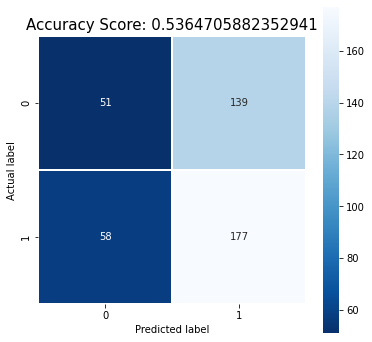

In [5623]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

##Roc curve

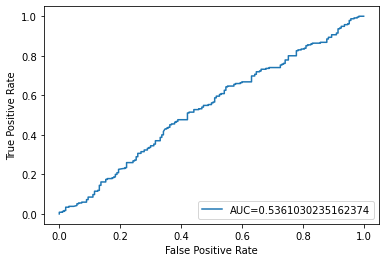

In [5624]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Stepwise Logistic Regression

## stepwise regression (feature one)

In [5625]:
include=list(X_train.columns)

In [5626]:
import statsmodels.api as sm
#testing out for one at a time before creating loop
log_reg=sm.Logit(Y_train,X_train[include[0]]).fit()
#see it all
print(log_reg.summary())
#see log likelihood
print(log_reg.llf)
loglik =log_reg.llf
#BIC calculation (math.log with one arguement is natural log)
bic = (1 * math.log(len(Y_test))) - (2 * loglik)
print(bic)
#the built in bic is slightly different, we will stay with ours
log_reg.bic


Optimization terminated successfully.
         Current function value: 0.692958
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1698
Method:                           MLE   Df Model:                            0
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:               -0.008944
Time:                        00:03:20   Log-Likelihood:                -1177.3
converged:                       True   LL-Null:                       -1166.9
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
URDBP3LC      -0.2151      0.269     -0.800      0.424      -0.742       0.312
-1177.3350133804138
2360.7221

2362.1078218824996

In [5627]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict= {}
loglik_dict= {}
causes_error=[]
#for loop for the first to include
for i in include:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[i]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict[i]=bic
    loglik_dict[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.692958
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693143
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.687841
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683383
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692441
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.689586
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.689239
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690878
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690252
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693049
  

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [5628]:
#looking at all the bic scores
bic_dict

{'URD14DLC': 2361.00533969624,
 'URDBP3LC': 2360.722115929752,
 'URDBPFLC': 2343.70388218127,
 'URDBPHLC': 2361.353550145709,
 'URDBPSLC': 2360.8690233910106,
 'URDBUPLC': 2348.085676006763,
 'URDCNPLC': 2360.270524717322,
 'URDCOPLC': 2361.3662087116186,
 'URDDCBLC': 2361.0719212113377,
 'URDECPLC': 2361.1648535761115,
 'URDEPBLC': 2351.5284563414084,
 'URDMBPLC': 2360.23452243264,
 'URDMC1LC': 2355.43830777,
 'URDMCHLC': 2350.2046177611455,
 'URDMHHLC': 2360.7621433050977,
 'URDMHPLC': 2355.3158206517132,
 'URDMIBLC': 2358.1992647399734,
 'URDMNPLC': 2353.4613160055774,
 'URDMOHLC': 2361.0313147619763,
 'URDMPBLC': 2361.031314761976,
 'URDMZPLC': 2357.8755842692444,
 'URDPPBLC': 2360.936167525521,
 'URDTLCLC': 2328.189102838488,
 'URDTRSLC': 2358.9673072038718,
 'URXBPF': 2347.637141217116,
 'URXBUP': 2349.2658339416494,
 'URXEPB': 2353.6554005591565,
 'URXMHP': 2356.933619561938,
 'URXMNP': 2356.699042284762,
 'URXTLC': 2343.3344525680463}

In [5629]:
#looking at all the log likelihoods
loglik_dict

{'URD14DLC': -1177.4766252636578,
 'URDBP3LC': -1177.3350133804138,
 'URDBPFLC': -1168.8258965061727,
 'URDBPHLC': -1177.6507304883924,
 'URDBPSLC': -1177.4084671110431,
 'URDBUPLC': -1171.0167934189194,
 'URDCNPLC': -1177.109217774199,
 'URDCOPLC': -1177.6570597713471,
 'URDDCBLC': -1177.5099160212067,
 'URDECPLC': -1177.5563822035936,
 'URDEPBLC': -1172.738183586242,
 'URDMBPLC': -1177.0912166318578,
 'URDMC1LC': -1174.6931093005378,
 'URDMCHLC': -1172.0762642961106,
 'URDMHHLC': -1177.3550270680867,
 'URDMHPLC': -1174.6318657413944,
 'URDMIBLC': -1176.0735877855245,
 'URDMNPLC': -1173.7046134183265,
 'URDMOHLC': -1177.489612796526,
 'URDMPBLC': -1177.4896127965258,
 'URDMZPLC': -1175.91174755016,
 'URDPPBLC': -1177.4420391782983,
 'URDTLCLC': -1161.0685068347818,
 'URDTRSLC': -1176.4576090174737,
 'URXBPF': -1170.7925260240959,
 'URXBUP': -1171.6068723863625,
 'URXEPB': -1173.801655695116,
 'URXMHP': -1175.4407651965068,
 'URXMNP': -1175.3234765579189,
 'URXTLC': -1168.641181699561}

In [5630]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))],min(bic_dict.values()),loglik_dict[list(loglik_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))]])

URDTLCLC 2328.189102838488 -1161.0685068347818


In [5631]:
used_step3=[]
used_step3.append(list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))])
used_step3

['URDTLCLC']

In [5632]:
log_reg=sm.Logit(Y_train,X_train[used_step3]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.683383
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1698
Method:                           MLE   Df Model:                            0
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                0.004996
Time:                        00:03:20   Log-Likelihood:                -1161.1
converged:                       True   LL-Null:                       -1166.9
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
URDTLCLC       0.3687      0.065      5.711      0.000       0.242       0.495


In [5633]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(X_train[used_step3],Y_train)
prediction = clf.predict_proba(X_test[used_step3])
score = model.score(X_test[used_step3],Y_test)
print(score)

0.5529411764705883


In [5634]:
predictions = [round(value) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5529411764705883


In [5635]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[  0 190]
 [  0 235]]


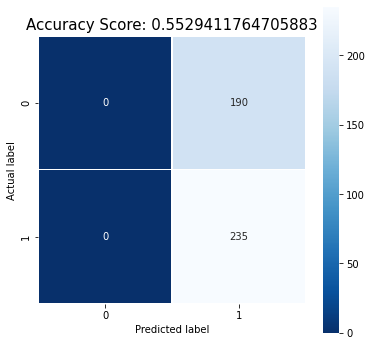

In [5636]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Stepwise Regression (feature 2)

In [5637]:
#we make a new list without the feature we are already using, and removing the chemicals that create singular matrix issues
#(which is Perfluorononanoic acid (ug/L) detection level)
include_2=list(X_train.drop(columns=used_step3).columns)

In [5638]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_2= {}
loglik_dict_2= {}
causes_error_2=[]
#for loop for the second to include
for i in include_2:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[[used_step3[0],i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_2[i]=bic
    loglik_dict_2[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_2.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.682600
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682961
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683025
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683190
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683382
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683379
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683125
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683370
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683017
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683383
  

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [5639]:
causes_error_2

['URDMEPLC']

In [5640]:
#looking at all the bic scores
bic_dict_2

{'URD14DLC': 2326.2655499229913,
 'URDBP3LC': 2325.526351739764,
 'URDBPFLC': 2325.811332437167,
 'URDBPHLC': 2326.7519282312464,
 'URDBPSLC': 2326.7194140496144,
 'URDBUPLC': 2328.1733668521406,
 'URDCNPLC': 2328.0245228889567,
 'URDCOPLC': 2328.172271188984,
 'URDDCBLC': 2327.6601256414365,
 'URDECPLC': 2328.1467795855538,
 'URDEPBLC': 2328.142326241821,
 'URDMBPLC': 2323.760666359314,
 'URDMC1LC': 2327.7701870796477,
 'URDMCHLC': 2327.575504751535,
 'URDMHHLC': 2328.1613787352326,
 'URDMHPLC': 2327.4752317090415,
 'URDMIBLC': 2319.6763868760413,
 'URDMNPLC': 2327.052208305089,
 'URDMOHLC': 2327.0625818432404,
 'URDMPBLC': 2326.9452513356205,
 'URDMZPLC': 2327.5993534705335,
 'URDPPBLC': 2328.1887571741872,
 'URDTRSLC': 2327.533154357468,
 'URXBPF': 2325.2415768723167,
 'URXBUP': 2328.1851193732296,
 'URXEPB': 2327.3106591709025,
 'URXMHP': 2326.7678861552163,
 'URXMNP': 2325.1597770259127,
 'URXTLC': 2326.9702711637156}

In [5641]:
#looking at all the log likelihoods
loglik_dict_2

{'URD14DLC': -1160.1067303770335,
 'URDBP3LC': -1159.7371312854198,
 'URDBPFLC': -1159.8796216341213,
 'URDBPHLC': -1160.349919531161,
 'URDBPSLC': -1160.333662440345,
 'URDBUPLC': -1161.0606388416081,
 'URDCNPLC': -1160.9862168600162,
 'URDCOPLC': -1161.0600910100297,
 'URDDCBLC': -1160.804018236256,
 'URDECPLC': -1161.0473452083147,
 'URDEPBLC': -1161.0451185364484,
 'URDMBPLC': -1158.854288595195,
 'URDMC1LC': -1160.8590489553617,
 'URDMCHLC': -1160.7617077913053,
 'URDMHHLC': -1161.0546447831541,
 'URDMHPLC': -1160.7115712700586,
 'URDMIBLC': -1156.8121488535585,
 'URDMNPLC': -1160.5000595680824,
 'URDMOHLC': -1160.505246337158,
 'URDMPBLC': -1160.446581083348,
 'URDMZPLC': -1160.7736321508046,
 'URDPPBLC': -1161.0683340026314,
 'URDTRSLC': -1160.7405325942718,
 'URXBPF': -1159.5947438516962,
 'URXBUP': -1161.0665151021526,
 'URXEPB': -1160.629285000989,
 'URXMHP': -1160.357898493146,
 'URXMNP': -1159.5538439284942,
 'URXTLC': -1160.4590909973956}

In [5642]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))],min(bic_dict_2.values()),loglik_dict_2[list(loglik_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))]])

URDMIBLC 2319.6763868760413 -1156.8121488535585


In [5643]:
used_step3.append(list(bic_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))])
used_step3

['URDTLCLC', 'URDMIBLC']

In [5644]:
log_reg=sm.Logit(Y_train,X_train[used_step3]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.680878
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1697
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                0.008644
Time:                        00:03:21   Log-Likelihood:                -1156.8
converged:                       True   LL-Null:                       -1166.9
Covariance Type:            nonrobust   LLR p-value:                 7.077e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
URDTLCLC       0.4052      0.066      6.143      0.000       0.276       0.535
URDMIBLC      -0.8892      0.

In [5645]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(X_train[used_step3],Y_train)
prediction = clf.predict_proba(X_test[used_step3])
score = model.score(X_test[used_step3],Y_test)
print(score)

0.5576470588235294


In [5646]:
predictions = [round(value) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5576470588235294


In [5647]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[  8 182]
 [  6 229]]


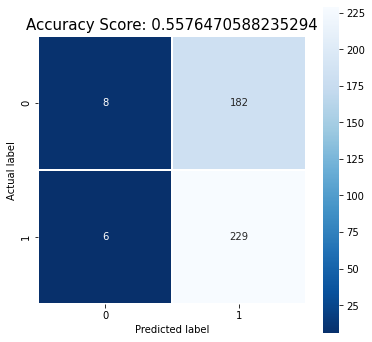

In [5648]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Stepwise Regression (feature 3)




In [5649]:
#we make a new list without the feature we are already using 
#(which is Perfluoroundecanoic comment a.k.a binary detect or not)
include_3=list(X_train.drop(columns=used_step3).columns)

In [5650]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_3= {}
loglik_dict_3= {}
causes_error_3=[]
#for loop for the second to include
for i in include_3:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[[used_step3[0],used_step3[1],i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_3[i]=bic
    loglik_dict_3[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_3.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.680282
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680779
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680555
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680763
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680874
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680877
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680683
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680878
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680790
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680842
  

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [5651]:
causes_error_3

['URDMEPLC']

In [5652]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
#this got annoying to change so made a function
def bic_loglik(bicdictionary,loglikedictionary):
  return list(bicdictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))],min(bicdictionary.values()),loglikedictionary[list(loglikedictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))]]

In [5653]:
print(bic_loglik(bic_dict_3,loglik_dict_3))

('URDMZPLC', 2315.733150775297, -1154.8405308031863)


In [5654]:
used_step3.append(list(bic_dict_3.keys())[list(bic_dict_3.values()).index(min(bic_dict_3.values()))])
used_step3

['URDTLCLC', 'URDMIBLC', 'URDMZPLC']

In [5655]:
log_reg=sm.Logit(Y_train,X_train[used_step3]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.679718
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1696
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.01033
Time:                        00:03:22   Log-Likelihood:                -1154.8
converged:                       True   LL-Null:                       -1166.9
Covariance Type:            nonrobust   LLR p-value:                 5.799e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
URDTLCLC       0.3881      0.067      5.836      0.000       0.258       0.518
URDMIBLC      -1.1467      0.

In [5656]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train[used_step3],Y_train)
y_pred = model.predict_proba(X_test[used_step3])
prediction = [round(value) for value in y_pred[:,1]]
score = metrics.accuracy_score(Y_test, prediction)
print(score)

0.5576470588235294


In [5657]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5576470588235294


In [5658]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[  8 182]
 [  6 229]]


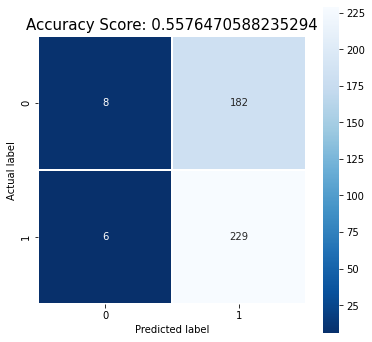

In [5659]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

done, no longer improving

## ROC curves

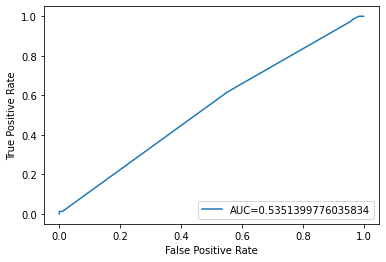

In [5660]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Naiman's stepwise–chloes way

In [5661]:
DFTrain, DFTest = X_train.copy(), X_test.copy()
DFTrain['Y']=Y_train
DFTest['Y']=Y_test

In [5662]:
used=[]
unused=[c for c in DFTrain.columns if c!="Y"]

ctr=0
maxloglike=-9999999999
for c in unused:
    #print(c)
    LR = LogisticRegression()
    DFT=DFTrain.loc[:,used+[c]]
    LR.fit(DFT,DFTrain["Y"])
    plog=LR.predict_log_proba(DFT)
    plog0=plog[:,0]
    plog1=plog[:,1]
    loglike=np.sum(DFTrain["Y"]*plog1+(1-DFTrain["Y"])*plog0)
    if loglike>maxloglike:
        maxloglike=loglike
        bestc=c

    
print("variable added = "+str(bestc)+" maximum likelihood = " + str(maxloglike))
used.append(bestc)
unused=[c for c in unused if c!=bestc]
for ctr in range(25):
    maxloglike=-99999999
    for c in unused:
        LR = LogisticRegression()
        DFT=DFTrain.loc[:,used+[c]]
        try:
            LR.fit(DFT,DFTrain["Y"])
            plog=LR.predict_log_proba(DFT)
            plog0=plog[:,0]
            plog1=plog[:,1]
            loglike=np.sum(DFTrain["Y"]*plog1+(1-DFTrain["Y"])*plog0)
            if loglike>maxloglike:
                maxloglike=loglike
                bestc=c
        except:
            pass
    print("variable added = "+str(bestc)+" maximum likelihood = " + str(maxloglike))
    used.append(bestc)
    unused=[c for c in unused if c!=bestc]


variable added = URDTLCLC maximum likelihood = -1160.998241239847
variable added = URDMIBLC maximum likelihood = -1156.7345063257947
variable added = URDMZPLC maximum likelihood = -1154.8526054949334
variable added = URXBPF maximum likelihood = -1153.1838695312313
variable added = URXMNP maximum likelihood = -1151.661011449015
variable added = URDBP3LC maximum likelihood = -1150.481175078512
variable added = URD14DLC maximum likelihood = -1149.3874536375856
variable added = URXTLC maximum likelihood = -1148.6089792491139
variable added = URDMCHLC maximum likelihood = -1147.8289010450617
variable added = URDMBPLC maximum likelihood = -1147.0942315491498
variable added = URDMC1LC maximum likelihood = -1146.2558651306128
variable added = URDMEPLC maximum likelihood = -1145.6354564463513
variable added = URDBPSLC maximum likelihood = -1144.9466243283348
variable added = URDBPFLC maximum likelihood = -1144.5185519768118
variable added = URDBPHLC maximum likelihood = -1144.1411512266645
vari

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


variable added = URDMPBLC maximum likelihood = -1142.3790234654984


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


variable added = URDMNPLC maximum likelihood = -1142.2916738207787


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


variable added = URDDCBLC maximum likelihood = -1142.2012297789643
variable added = URDPPBLC maximum likelihood = -1142.1202221826852


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


variable added = URDCOPLC maximum likelihood = -1142.0617687483327
variable added = URDEPBLC maximum likelihood = -1142.0362676300717


In [5663]:
print(used)

['URDTLCLC', 'URDMIBLC', 'URDMZPLC', 'URXBPF', 'URXMNP', 'URDBP3LC', 'URD14DLC', 'URXTLC', 'URDMCHLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDBPSLC', 'URDBPFLC', 'URDBPHLC', 'URDMOHLC', 'URDMHHLC', 'URDTRSLC', 'URDCNPLC', 'URXEPB', 'URDMPBLC', 'URDMNPLC', 'URDDCBLC', 'URDPPBLC', 'URDCOPLC', 'URDEPBLC']


In [5664]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(DFTrain[used],DFTrain["Y"])
y_pred = model.predict_proba(DFTest[used])
prediction = [round(value) for value in y_pred[:,1]]
score = metrics.accuracy_score(DFTest["Y"], prediction)
print(score)

0.5388235294117647


In [5665]:
#for later use
y_pred_steplog = model.predict_proba(DFTest[used])
prediction_steplog = [round(value) for value in y_pred_steplog[:,1]]
score_steplog = metrics.accuracy_score(DFTest["Y"], prediction_steplog)

In [5666]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(DFTest["Y"], predictions)
print(accuracy)

0.5388235294117647


In [5667]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(DFTest["Y"], predictions)
print(cm)

[[ 51 139]
 [ 57 178]]


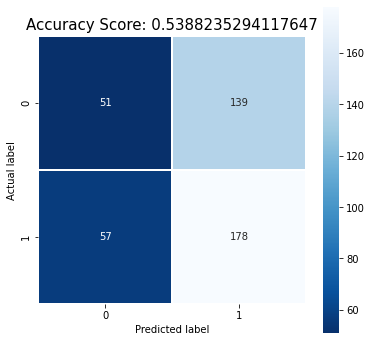

In [5668]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

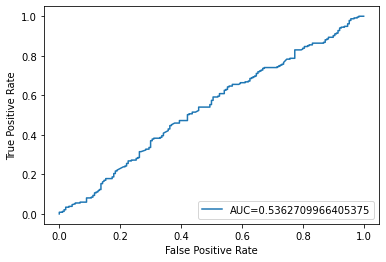

In [5669]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(DFTest["Y"],  y_pred[:,1])
auc = metrics.roc_auc_score(DFTest["Y"],  y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

clearly I must have messed up the model

#XGBOOST

In [5670]:
!pip install xgboost

In [5671]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict_proba(X_test)
predictions = [round(value) for value in y_pred[:,1]]
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

0.5411764705882353


## Roc curve

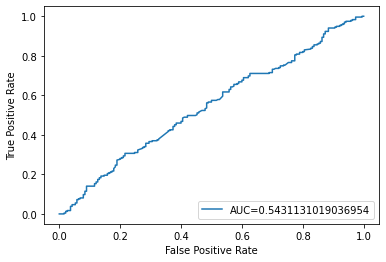

In [5672]:
#ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

area is lower*

In [5673]:
X_train

,URDBP3LC,URDBPHLC,URXTLC,URDTLCLC,URDTRSLC,URXBUP,URDBUPLC,URXEPB,URDEPBLC,URDMPBLC,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
1739,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,-0.342490,1.0,0.0,...,0.000000,0.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
627,0.0,0.0,-2.659260,1.0,1.0,2.681022,0.0,1.791759,0.0,0.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.356675,0.0,0.0
2108,0.0,0.0,-2.302585,0.0,0.0,-1.609438,0.0,0.470004,0.0,0.0,...,1.568616,0.0,0.0,0.000000,0.0,0.0,0.0,-0.510826,0.0,0.0
890,0.0,0.0,-2.302585,0.0,1.0,-2.659260,1.0,-0.342490,1.0,0.0,...,0.262364,0.0,0.0,0.182322,0.0,0.0,0.0,-1.966113,1.0,0.0
2123,0.0,0.0,-1.203973,0.0,0.0,-2.659260,1.0,-0.342490,1.0,0.0,...,1.931521,0.0,0.0,2.760010,0.0,0.0,0.0,-0.356675,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,0.0,-2.659260,1.0,1.0,-2.659260,1.0,-0.342490,1.0,0.0,...,-0.562119,1.0,0.0,-0.446287,1.0,1.0,1.0,-1.966113,1.0,0.0
1674,0.0,0.0,-2.302585,0.0,0.0,-2.302585,0.0,6.590438,0.0,0.0,...,1.840550,0.0,0.0,2.646175,0.0,0.0,0.0,0.095310,0.0,0.0
957,0.0,0.0,0.262364,0.0,0.0,-2.659260,1.0,-0.342490,1.0,0.0,...,1.435085,0.0,0.0,1.871802,0.0,0.0,0.0,-1.966113,1.0,0.0
1108,0.0,0.0,1.410987,0.0,0.0,1.704748,0.0,1.740466,0.0,0.0,...,0.587787,0.0,0.0,0.530628,0.0,0.0,0.0,1.609438,0.0,0.0


#Random Forest

[Classification with Random Forests in Python
](https://towardsdatascience.com/classification-with-random-forests-in-python-29b8381680ed)

In [5674]:
from sklearn.ensemble import RandomForestClassifier
 
# create regressor object
regressor = RandomForestClassifier(random_state = 0)
 
#fit the regressor with x and y data
regressor.fit(X_train, Y_train) 
#Prediction = regressor.predict_proba(X_test)
y_pred = regressor.predict_proba(X_test)
prediction = [round(value) for value in y_pred[:,1]]

In [5675]:
print(prediction)

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 

In [5676]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.4988235294117647 % correct


In [5677]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[ 77 113]
 [100 135]]


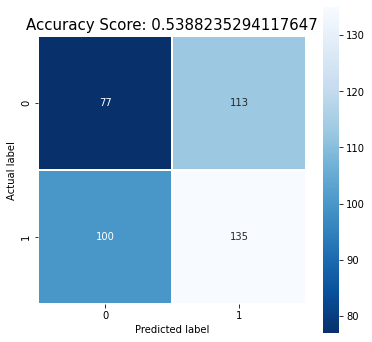

In [5678]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

In [5679]:
metrics.f1_score(Y_test,prediction)

0.5590062111801243

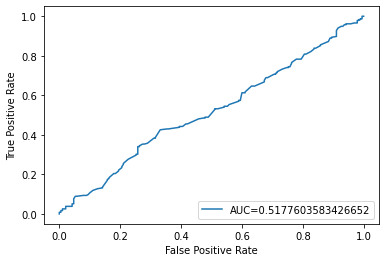

In [5680]:
#ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Nearest Neighbors

In [5681]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_scaled, Y_train)
y_pred = classifier.predict_proba(X_test_scaled)
prediction = [round(value) for value in y_pred[:,1]]

In [5682]:
print(prediction)

[1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 

In [5683]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.5670588235294117 % correct


In [5684]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[105  85]
 [ 99 136]]


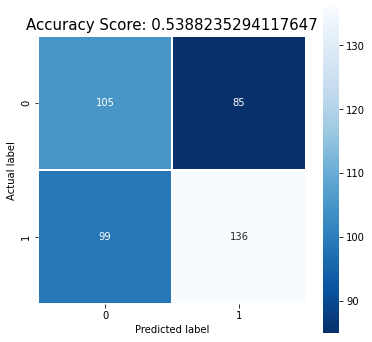

In [5685]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

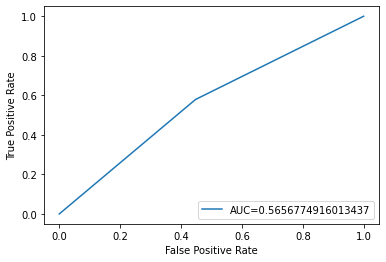

In [5686]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#KNN-did k=5

In [5687]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_scaled, Y_train)
y_pred = classifier.predict_proba(X_test_scaled)
prediction = [round(value) for value in y_pred[:,1]]

In [5688]:
print(prediction)

[1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 

In [5689]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.5458823529411765 % correct


In [5690]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[ 83 107]
 [ 86 149]]


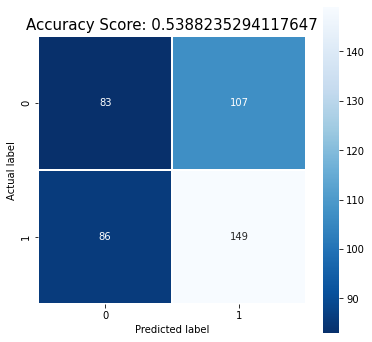

In [5691]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

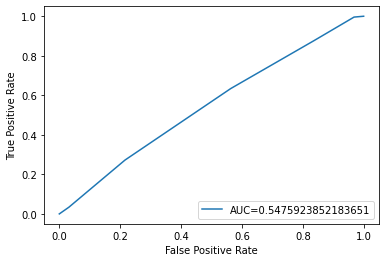

In [5692]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Lasso Regression

[Lasso Regression with Python](https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/)

In [5693]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train_scaled, Y_train)

Lasso(alpha=1)

In [5694]:
print('R squared training set', round(reg.score(X_train_scaled, Y_train)*100, 2))
print('R squared test set', round(reg.score(X_test_scaled, Y_test)*100, 2))

R squared training set 0.0
R squared test set -0.0


In [5695]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test_scaled)
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 0.25
MSE test set 0.25


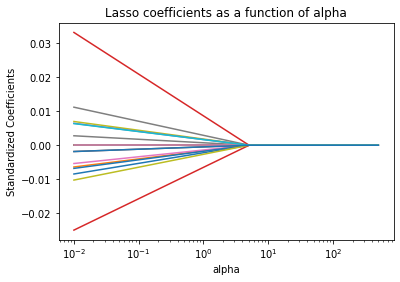

In [5696]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [5697]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_lasso = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_lasso.fit(X_train_scaled, Y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [5698]:
model_lasso.alpha_


0.019227287247840168

In [5699]:
# Set best alpha
lasso_best = Lasso(alpha=model_lasso.alpha_)
lasso_best.fit(X_train_scaled, Y_train)

Lasso(alpha=0.019227287247840168)

In [5700]:
Lasso(alpha=model_lasso.alpha_)

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


Lasso(alpha=0.019227287247840168)

In [5701]:
print(list(zip(lasso_best.coef_, X_train)))

[(-9.570596563481592e-05, 'URDBP3LC'), (-0.0, 'URDBPHLC'), (-0.0, 'URXTLC'), (0.023303893199735227, 'URDTLCLC'), (-0.0, 'URDTRSLC'), (0.0, 'URXBUP'), (-0.0, 'URDBUPLC'), (0.0, 'URXEPB'), (-0.0, 'URDEPBLC'), (-0.0, 'URDMPBLC'), (0.0, 'URDPPBLC'), (-0.0, 'URD14DLC'), (-0.0, 'URDDCBLC'), (0.0, 'URDCNPLC'), (-0.0, 'URDCOPLC'), (0.0, 'URDECPLC'), (-0.0, 'URDMBPLC'), (0.0, 'URDMC1LC'), (0.0, 'URDMEPLC'), (0.0, 'URDMHHLC'), (-0.0, 'URDMCHLC'), (0.0, 'URXMHP'), (-0.0, 'URDMHPLC'), (-0.014468542150440265, 'URDMIBLC'), (0.0, 'URXMNP'), (-0.0, 'URDMNPLC'), (-0.0, 'URDMOHLC'), (0.0, 'URDMZPLC'), (-0.0035993460947130462, 'URXBPF'), (0.0, 'URDBPFLC'), (-0.0, 'URDBPSLC')]


In [5702]:
print('R squared training set', round(lasso_best.score(X_train_scaled, Y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test_scaled, Y_test)*100, 2))

R squared training set 0.93
R squared test set 0.58


In [5703]:
mean_squared_error(Y_test, lasso_best.predict(X_test_scaled))

0.24577409941960396

run ROC curve instead!!!

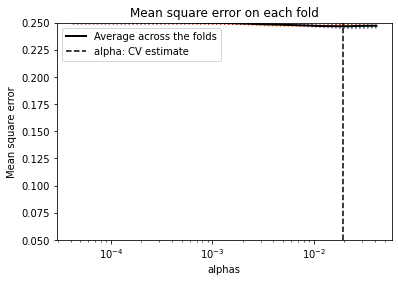

In [5704]:
plt.semilogx(model_lasso.alphas_, model_lasso.mse_path_, ":")
plt.plot(
    model_lasso.alphas_ ,
    model_lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model_lasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0.05, 0.25
plt.ylim(ymin, ymax);

In [5705]:
reg = Lasso(alpha=model_lasso.alpha_)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_test_scaled)

not being able to use proba might be enough reason to not include this method, instead using the predictions with the documented threasholds to do it.

In [5706]:
y_pred

array([0.52669488, 0.58150231, 0.53232394, 0.52989031, 0.52529417,
       0.57789145, 0.53161015, 0.57478309, 0.53421497, 0.57834382,
       0.53421497, 0.52910016, 0.49235611, 0.57688541, 0.52856409,
       0.58150231, 0.53332998, 0.53161015, 0.53332998, 0.58150231,
       0.52774408, 0.53232394, 0.52336453, 0.58150231, 0.4445327 ,
       0.57617161, 0.5763875 , 0.58150231, 0.57889749, 0.52678195,
       0.57961128, 0.53332998, 0.57750897, 0.53421497, 0.58150231,
       0.52968556, 0.57662399, 0.53022163, 0.53105648, 0.58096624,
       0.53332998, 0.57961128, 0.57889749, 0.52802005, 0.53421497,
       0.53421497, 0.53232394, 0.58150231, 0.53421497, 0.57503142,
       0.53421497, 0.52534331, 0.52151407, 0.57617161, 0.57961128,
       0.58150231, 0.52910016, 0.53421497, 0.57789145, 0.57735538,
       0.57455737, 0.58061732, 0.52850179, 0.57834382, 0.58150231,
       0.58150231, 0.58150231, 0.57789145, 0.52989031, 0.53161015,
       0.57201814, 0.58150231, 0.57961128, 0.53232394, 0.57561

In [5707]:
prediction=y_pred.copy()
for i in range(len(prediction)):
  if prediction[i] >= 0.10:
    prediction[i]=0
  elif prediction[i] < 0.10:
    prediction[i]=1

In [5708]:
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [5709]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.4470588235294118 % correct


In [5710]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[190   0]
 [235   0]]


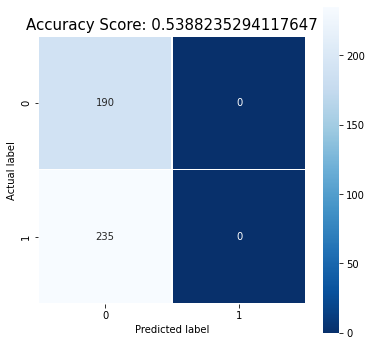

In [5711]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

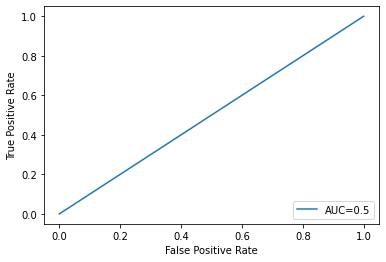

In [5712]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  prediction)
auc = metrics.roc_auc_score(Y_test, prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#LDA

[Comparison of LDA and PCA 2D projection of Iris dataset](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py)

In [5713]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
LinearDiscriminantAnalysis()
y_pred=clf.predict_proba(X_test)
prediction = [round(value) for value in y_pred[:,1]]
print(prediction)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 

In [5714]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.5364705882352941 % correct


In [5715]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[ 52 138]
 [ 59 176]]


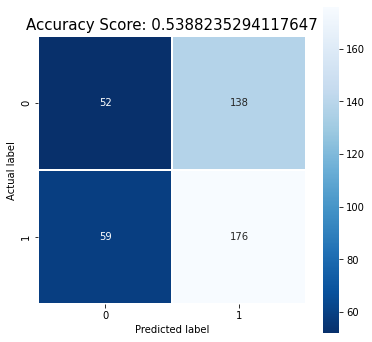

In [5716]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

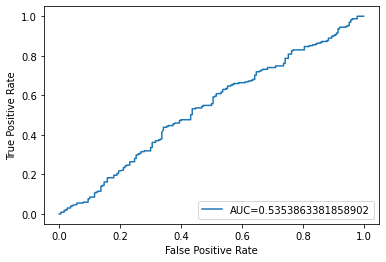

In [5717]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

special we need to redefine DF


In [5718]:
DF2=DF.copy()

In [5719]:
DF2

,LBXMPAH,LBDMPAHL,URDBP3LC,URDBPHLC,URXTLC,URDTLCLC,URDTRSLC,URXBUP,URDBUPLC,URXEPB,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,-1.609438,0.0,0.0,0.0,-1.609438,0.0,0.0,-2.659260,1.0,0.788457,...,-0.562119,1.0,1.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,1.0
1,-1.609438,0.0,0.0,0.0,-1.609438,0.0,0.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.510826,0.0,0.0
2,-2.659260,1.0,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,0.095310,...,2.014903,0.0,0.0,4.932313,0.0,0.0,0.0,0.470004,0.0,0.0
3,-2.659260,1.0,0.0,0.0,-2.302585,0.0,0.0,-2.659260,1.0,3.594569,...,1.740466,0.0,0.0,1.252763,0.0,0.0,0.0,-1.966113,1.0,0.0
4,-2.659260,1.0,0.0,0.0,-2.659260,1.0,0.0,4.420045,0.0,4.673763,...,0.832909,0.0,0.0,-0.446287,1.0,0.0,0.0,-0.916291,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,-1.609438,0.0,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.693147,0.0,0.0
2120,-2.659260,1.0,0.0,0.0,-2.659260,1.0,1.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.203973,0.0,0.0
2121,-2.659260,1.0,0.0,1.0,-2.659260,1.0,1.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
2122,-2.659260,1.0,0.0,0.0,-1.609438,0.0,1.0,-2.659260,1.0,-0.342490,...,1.568616,0.0,0.0,1.163151,0.0,0.0,0.0,-1.966113,1.0,1.0


In [5720]:
X=DF2.drop(columns=['LBXMPAH', 'LBDMPAHL']) 
y=DF2['LBDMPAHL']

In [5721]:
X_r = clf.fit(X, y).transform(X)

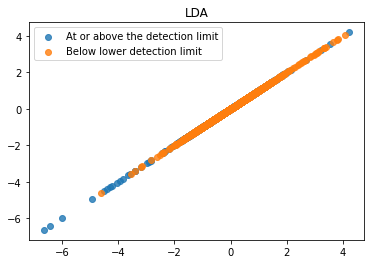

In [5722]:
plt.figure()
labels = ['At or above the detection limit','Below lower detection limit']
for i,label in zip([0, 1],labels):
    plt.scatter(
        X_r[y == i], X_r[y == i], alpha=0.8, label=label
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA")

plt.show()

horrible

#SVM

##linear kernal

In [5723]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)
#y_pred = svclassifier.predict_proba(X_test)
y_pred = svclassifier.predict(X_test)

In [5724]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [5725]:
count= 0
for i, j in zip(y_pred,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(y_pred))
print(percent_correct,'% correct')

0.5435294117647059 % correct


In [5726]:
prediction=y_pred.copy()
for i in range(len(prediction)):
  if prediction[i] >= 0.10:
    prediction[i]=0
  elif prediction[i] < 0.10:
    prediction[i]=1

In [5727]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, y_pred)
print(cm)

[[ 14 176]
 [ 18 217]]


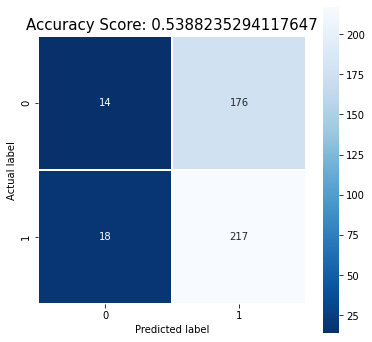

In [5728]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

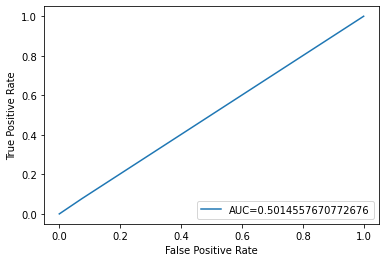

In [5729]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  prediction)
auc = metrics.roc_auc_score(Y_test, prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##Poly kernal

In [5730]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, Y_train)
#y_pred = svclassifier.predict_proba(X_test)
y_pred = svclassifier.predict(X_test)

In [5731]:
y_pred

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [5732]:
count= 0
for i, j in zip(y_pred,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(y_pred))
print(percent_correct,'% correct')

0.5505882352941176 % correct


In [5733]:
prediction=y_pred.copy()
for i in range(len(prediction)):
  if prediction[i] >= 0.10:
    prediction[i]=0
  elif prediction[i] < 0.10:
    prediction[i]=1

In [5734]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, y_pred)
print(cm)

[[ 19 171]
 [ 20 215]]


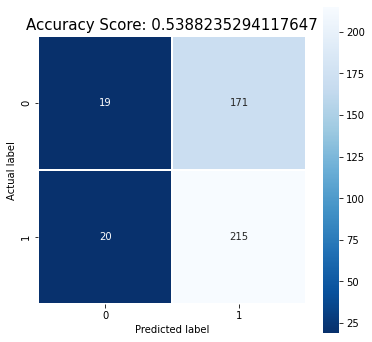

In [5735]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

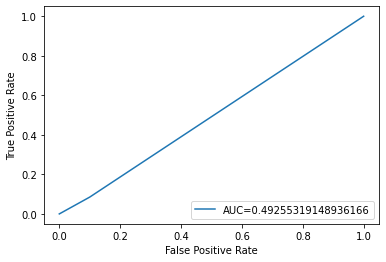

In [5736]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  prediction)
auc = metrics.roc_auc_score(Y_test, prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##rbf kernal

In [5737]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, Y_train)
#y_pred = svclassifier.predict_proba(X_test)
y_pred = svclassifier.predict(X_test)

In [5738]:
y_pred

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [5739]:
count= 0
for i, j in zip(y_pred,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(y_pred))
print(percent_correct,'% correct')

0.5294117647058824 % correct


In [5740]:
prediction=y_pred.copy()
for i in range(len(prediction)):
  if prediction[i] >= 0.10:
    prediction[i]=0
  elif prediction[i] < 0.10:
    prediction[i]=1

In [5741]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, y_pred)
print(cm)

[[ 16 174]
 [ 26 209]]


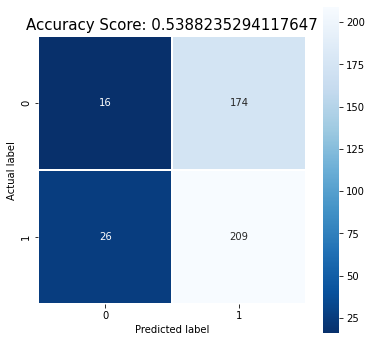

In [5742]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

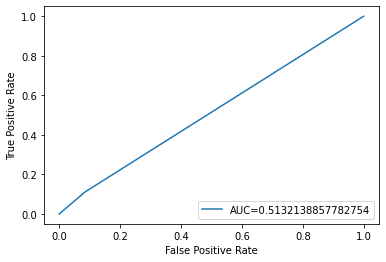

In [5743]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  prediction)
auc = metrics.roc_auc_score(Y_test, prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Naive Bayes–absolute garbage

In [5744]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, Y_train)
y_pred = classifier.predict_proba(X_test_scaled)
predictions = [round(value) for value in y_pred[:,1]]
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

0.4447058823529412


In [5745]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[188   2]
 [234   1]]


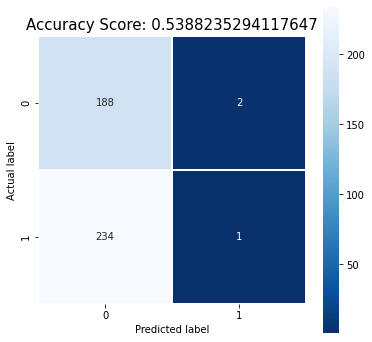

In [5746]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

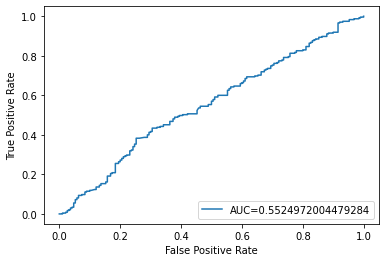

In [5747]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#All compared


dataframe first

In [5748]:
test_Df= pd.DataFrame(columns = ['Actual', 'Logistic Regression','Stepwise Logistic Regression 3','Stepwise Logistic Regression','XGBOOST','Random Forest','NN','KNN-5','Lasso','LDA','SVM Linear','SVM Poly','SVM RBF','Naive Bayes'])
test_Df['Actual']=Y_test

plot_Df= pd.DataFrame(columns = ['Actual', 'Logistic Regression','Stepwise Logistic Regression 3','Stepwise Logistic Regression','XGBOOST','Random Forest','NN','KNN-5','Lasso','LDA','SVM Linear','SVM Poly','SVM RBF','Naive Bayes'])
plot_Df['Actual']=Y_test


#logistic regression
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred_log = model.predict_proba(X_test)
prediction_log = [round(value) for value in y_pred_log[:,1]]
score_log = metrics.accuracy_score(Y_test, prediction_log)
test_Df['Logistic Regression']=prediction_log
plot_Df['Logistic Regression']=y_pred_log[:,1]


#stepwise with 3 logistic
model = LogisticRegression()
model.fit(X_train[used_step3],Y_train)
y_pred_steplog3 = model.predict_proba(X_test[used_step3])
prediction_steplog3 = [round(value) for value in y_pred_steplog3[:,1]]
score_steplog3 = metrics.accuracy_score(Y_test, prediction_steplog3)
test_Df['Stepwise Logistic Regression 3']=prediction_steplog3
plot_Df['Stepwise Logistic Regression 3']=y_pred_steplog3[:,1]


#stepwise from naiman already saved
#y_pred_steplog
#prediction_steplog
#score_steplog
test_Df['Stepwise Logistic Regression']=prediction_steplog
plot_Df['Stepwise Logistic Regression']=y_pred_steplog[:,1]


#XGBOOST
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred_XG = model.predict_proba(X_test)
prediction_XG = [round(value) for value in y_pred_XG[:,1]]
score_XG = metrics.accuracy_score(Y_test, prediction_XG)
test_Df['XGBOOST']=prediction_XG
plot_Df['XGBOOST']=y_pred_XG[:,1]


#Random Forest
regressor = RandomForestClassifier(random_state = 0)
regressor.fit(X_train, Y_train) 
y_pred_forest= regressor.predict_proba(X_test)
prediction_forest = [round(value) for value in y_pred_forest[:,1]]
score_forest = metrics.accuracy_score(Y_test, prediction_forest)
test_Df['Random Forest']=prediction_forest
plot_Df['Random Forest']=y_pred_forest[:,1]


#NN
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_scaled, Y_train)
y_pred_NN = classifier.predict_proba(X_test_scaled)
prediction_NN = [round(value) for value in y_pred_NN[:,1]]
count= 0
for i, j in zip(prediction_NN,Y_test):
  if i==j:
    count+=1
score_NN=(count/len(Y_test))
test_Df['NN']=prediction_NN
plot_Df['NN']=y_pred_NN[:,1]


#KNN-K=5
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_scaled, Y_train)
y_pred_KNN = classifier.predict_proba(X_test_scaled)
prediction_KNN = [round(value) for value in y_pred_KNN[:,1]]
count= 0
for i, j in zip(prediction_KNN,Y_test):
  if i==j:
    count+=1
score_KNN=(count/len(Y_test))
test_Df['KNN-5']=prediction_KNN
plot_Df['KNN-5']=y_pred_KNN[:,1]


#LASSO
reg = Lasso(alpha=model_lasso.alpha_)
reg.fit(X_train_scaled, Y_train)
y_pred_lasso=reg.predict(X_test_scaled)
prediction_lasso=y_pred_lasso.copy()
for i in range(len(prediction_lasso)):
  if prediction_lasso[i] >= 0.10:
    prediction_lasso[i]=0
  elif prediction_lasso[i] < 0.10:
    prediction_lasso[i]=1
count= 0
for i, j in zip(prediction_lasso,Y_test):
  if i==j:
    count+=1
score_lasso=(count/len(Y_test))
test_Df['Lasso']=prediction_lasso
plot_Df['Lasso']=y_pred_lasso


#LDA
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
LinearDiscriminantAnalysis()
y_pred_LDA=clf.predict_proba(X_test)
prediction_LDA = [round(value) for value in y_pred_LDA[:,1]]
count= 0
for i, j in zip(prediction_LDA,Y_test):
  if i==j:
    count+=1
score_LDA=(count/len(Y_test))
test_Df['LDA']=prediction_LDA
plot_Df['LDA']=y_pred_LDA[:,1]


#SVM-Linear
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)
y_pred_SVML = svclassifier.predict(X_test)
prediction_SVML=y_pred_SVML.copy()
for i in range(len(prediction_SVML)):
  if prediction_SVML[i] >= 0.10:
    prediction_SVML[i]=0
  elif prediction_SVML[i] < 0.10:
    prediction_SVML[i]=1
count= 0
for i, j in zip(prediction_SVML,Y_test):
  if i==j:
    count+=1
score_SVML=(count/len(prediction_SVML))
test_Df['SVM Linear']=prediction_SVML
plot_Df['SVM Linear']=y_pred_SVML


#SVM-Poly
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, Y_train)
y_pred_SVMP = svclassifier.predict(X_test)
prediction_SVMP=y_pred_SVMP.copy()
for i in range(len(prediction_SVMP)):
  if prediction_SVMP[i] >= 0.10:
    prediction_SVMP[i]=0
  elif prediction_SVMP[i] < 0.10:
    prediction_SVMP[i]=1
count= 0
for i, j in zip(prediction_SVMP,Y_test):
  if i==j:
    count+=1
score_SVMP=(count/len(prediction_SVMP))
test_Df['SVM Poly']=prediction_SVMP
plot_Df['SVM Poly']=y_pred_SVMP


#SVM-RBF
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, Y_train)
y_pred_SVMR = svclassifier.predict(X_test)
prediction_SVMR=y_pred_SVMR.copy()
for i in range(len(prediction_SVMR)):
  if prediction_SVMR[i] >= 0.10:
    prediction_SVMR[i]=0
  elif prediction_SVMR[i] < 0.10:
    prediction_SVMR[i]=1
count= 0
for i, j in zip(prediction_SVMR,Y_test):
  if i==j:
    count+=1
score_SVMR=(count/len(prediction_SVMR))
test_Df['SVM RBF']=prediction_SVMR
plot_Df['SVM RBF']=y_pred_SVMR


#Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train_scaled, Y_train)
y_pred_NB = classifier.predict_proba(X_test_scaled)
prediction_NB = [round(value) for value in y_pred_NB[:,1]]
score_NB =metrics.accuracy_score(Y_test, prediction_NB)
test_Df['Naive Bayes']=prediction_NB
plot_Df['Naive Bayes']=y_pred_NB[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [5749]:
test_Df

,Actual,Logistic Regression,Stepwise Logistic Regression 3,Stepwise Logistic Regression,XGBOOST,Random Forest,NN,KNN-5,Lasso,LDA,SVM Linear,SVM Poly,SVM RBF,Naive Bayes
1367,0.0,1,1,1,0,1,1,1,0.0,1,0.0,0.0,0.0,0
1331,1.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,0
1925,1.0,1,1,1,1,1,0,0,0.0,1,0.0,0.0,0.0,0
1952,1.0,1,1,1,0,0,1,0,0.0,1,0.0,1.0,1.0,0
2053,0.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,0.0,0,1,0,0,0,1,0,0.0,0,0.0,0.0,0.0,0
362,1.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,0
214,1.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,0
819,0.0,1,1,1,1,1,0,1,0.0,1,0.0,0.0,0.0,0


In [5750]:
test_Df.to_csv('test_bin_outside_run10_c3.csv')

In [5751]:
plot_Df

,Actual,Logistic Regression,Stepwise Logistic Regression 3,Stepwise Logistic Regression,XGBOOST,Random Forest,NN,KNN-5,Lasso,LDA,SVM Linear,SVM Poly,SVM RBF,Naive Bayes
1367,0.0,0.515185,0.508462,0.510447,0.436444,0.590000,1.0,0.8,0.526695,0.513798,1.0,1.0,1.0,0.000153
1331,1.0,0.635322,0.595199,0.635441,0.582239,0.987037,1.0,1.0,0.581502,0.640131,1.0,1.0,1.0,0.000175
1925,1.0,0.554298,0.508462,0.555674,0.569191,0.540000,0.0,0.4,0.532324,0.555904,1.0,1.0,1.0,0.000131
1952,1.0,0.548408,0.508462,0.549142,0.486313,0.170000,1.0,0.4,0.529890,0.553247,1.0,0.0,0.0,0.000053
2053,0.0,0.522993,0.508462,0.524295,0.620956,0.770000,1.0,0.6,0.525294,0.525693,1.0,1.0,1.0,0.000060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,0.0,0.438584,0.508462,0.438830,0.467772,0.450000,1.0,0.4,0.521196,0.434785,1.0,1.0,1.0,0.000073
362,1.0,0.552652,0.595199,0.553473,0.556230,0.711333,1.0,0.8,0.579611,0.555506,1.0,1.0,1.0,0.000105
214,1.0,0.542720,0.508462,0.539492,0.630742,0.610000,1.0,0.8,0.529890,0.541871,1.0,1.0,1.0,0.000156
819,0.0,0.614963,0.595199,0.615212,0.582239,0.716502,0.0,0.8,0.581502,0.619105,1.0,1.0,1.0,0.000153


In [5752]:
plot_Df.to_csv('plot_outside_run10_c3.csv')

In [5753]:
scores={}
L1=['Logistic Regression','Stepwise Logistic Regression 3','Stepwise Logistic Regression','XGBOOST','Random Forest','NN','KNN-5','Lasso','LDA','SVM Linear','SVM Poly','SVM RBF','Naive Bayes']
L2=[score_log,score_steplog3,score_steplog,score_XG,score_forest,score_NN,score_KNN,score_lasso,score_LDA,score_SVML,score_SVMP,score_SVMR,score_NB]
for i,j in zip(L1,L2):
  scores[i]=float(j*100)
sorted(scores.items(), key=lambda x: x[1])

[('Naive Bayes', 44.470588235294116),
 ('Lasso', 44.70588235294118),
 ('SVM Poly', 44.94117647058823),
 ('SVM Linear', 45.64705882352941),
 ('SVM RBF', 47.05882352941176),
 ('Random Forest', 49.88235294117647),
 ('Logistic Regression', 53.64705882352941),
 ('LDA', 53.64705882352941),
 ('Stepwise Logistic Regression', 53.88235294117647),
 ('XGBOOST', 54.11764705882353),
 ('KNN-5', 54.58823529411765),
 ('Stepwise Logistic Regression 3', 55.76470588235294),
 ('NN', 56.705882352941174)]

In [5754]:
scores_df=pd.DataFrame([list(scores.values())],columns=[list(scores.keys())])
scores_df

,Logistic Regression,Stepwise Logistic Regression 3,Stepwise Logistic Regression,XGBOOST,Random Forest,NN,KNN-5,Lasso,LDA,SVM Linear,SVM Poly,SVM RBF,Naive Bayes
0,53.647059,55.764706,53.882353,54.117647,49.882353,56.705882,54.588235,44.705882,53.647059,45.647059,44.941176,47.058824,44.470588


In [5755]:
scores_df.to_csv('scores_outside_run10_c3.csv')

LDA 

Stepwise Logisitc Regression

3 Stepwise Logisitc Regression

logistic regression

XGBoost

Lasso

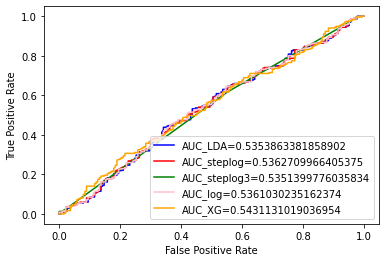

In [5756]:
#ROC curves on same plot
fpr_LDA, tpr_LDA, threshold_LDA = metrics.roc_curve(Y_test,  y_pred_LDA[:,1])
auc_LDA = metrics.roc_auc_score(Y_test, y_pred_LDA[:,1])
plt.plot(fpr_LDA,tpr_LDA,label="AUC_LDA="+str(auc_LDA),color='b')
fpr_steplog, tpr_steplog, threshold_steplog = metrics.roc_curve(Y_test,  y_pred_steplog[:,1])
auc_steplog = metrics.roc_auc_score(Y_test, y_pred_steplog[:,1])
plt.plot(fpr_steplog,tpr_steplog,label="AUC_steplog="+str(auc_steplog),color='r')
fpr_steplog3, tpr_steplog3, threshold_steplog3 = metrics.roc_curve(Y_test,  y_pred_steplog3[:,1])
auc_steplog3 = metrics.roc_auc_score(Y_test, y_pred_steplog3[:,1])
plt.plot(fpr_steplog3,tpr_steplog3,label="AUC_steplog3="+str(auc_steplog3),color='g')
fpr_log, tpr_log, threshold_log = metrics.roc_curve(Y_test,  y_pred_log[:,1])
auc_log = metrics.roc_auc_score(Y_test, y_pred_log[:,1])
plt.plot(fpr_log,tpr_log,label="AUC_log="+str(auc_log),color='pink')
fpr_XG, tpr_XG, threshold_XG = metrics.roc_curve(Y_test,  y_pred_XG[:,1])
auc_XG = metrics.roc_auc_score(Y_test, y_pred_XG[:,1])
plt.plot(fpr_XG,tpr_XG,label="AUC_XG="+str(auc_XG),color='orange')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [5757]:
match_Df=pd.DataFrame()
for i in L1:
  match_Df[i]= (test_Df['Actual']==test_Df[i])
display(match_Df)

,Logistic Regression,Stepwise Logistic Regression 3,Stepwise Logistic Regression,XGBOOST,Random Forest,NN,KNN-5,Lasso,LDA,SVM Linear,SVM Poly,SVM RBF,Naive Bayes
1367,False,False,False,True,False,False,False,True,False,True,True,True,True
1331,True,True,True,True,True,True,True,False,True,False,False,False,False
1925,True,True,True,True,True,False,False,False,True,False,False,False,False
1952,True,True,True,False,False,True,False,False,True,False,True,True,False
2053,False,False,False,False,False,False,False,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,True,False,True,True,True,False,True,True,True,True,True,True,True
362,True,True,True,True,True,True,True,False,True,False,False,False,False
214,True,True,True,True,True,True,True,False,True,False,False,False,False
819,False,False,False,False,False,True,False,True,False,True,True,True,True
